# Assignment 2
## Statistical Treatment for Retail Datasets

**Import library dan data yang akan digunakan**

In [310]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [337]:
data = pd.read_csv("nyc-rolling-sales.csv")

## *1. Preprocessing Data : Data Cleansing*
Sebelum melakukan analisis data, dilakukan terlebih dahulu langkah pre processing data agar data yang akan dianalisis sudah cukup baik sehingga tidak terjadi garbage in dan garbage out.
### Melihat Missing Value
 dilakukan pencarian apakah terdapat data hilang (*Standard missing value*) menggunakan library pandas.

In [338]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [340]:
data.shape

(84548, 22)

> Setelah dilihat menggunakan .info menunjukkan tidak terdapat missing value, namun pada kolom sales terlihat beberapa tanda "-" yang menunjukkan bahwa tidak terdapat data pada kolom tersebut atau yang disebut data kosong sehingga dilakukan replace "-" dengan nan.  

In [341]:
data = data.replace(' -  ', np.nan)
data = data.replace('', np.nan)

In [321]:
data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,NaN,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,NaN,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [342]:
data.isnull()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
84546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [343]:
data.isnull().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
EASE-MENT                             0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Setelah dilakukan replace data "-" menggunakan NaN ternyata terdapat missing value pada variabel LAND SQUARE FEET sebanyak 26252, GROSS SQUARE FEET sebanyak 27612 dan SALE PRICE sebanyak 14561. Dilakukan penanganan missing value, dengan dalah satu metode yang dapat digunakan yaitu menggantinya menggunakan nilai median masing-masing variabelnya.

### Handling Missing Value

In [344]:
data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].median(),inplace=True)
data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].median(),inplace=True)
data['SALE PRICE'].fillna(data['SALE PRICE'].median(),inplace=True)

In [345]:
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### *Identify Rows yang memiliki Duplicate Data*

In [346]:
dup = data.duplicated()
dup

0        False
1        False
2        False
3        False
4        False
         ...  
84543    False
84544    False
84545    False
84546    False
84547    False
Length: 84548, dtype: bool

In [347]:
print(dup.any())

False


Tidak Terdapat duplikasi Data. Setelah dilakukan tahapan preprocessing, akan dilakukan analisis statistik deskriptif dan inferensial menggunakan library yang dapat digunakan pada python (pandas, numpy, scipy)

##### Converting following object type variables to Category

In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Sebelum dilakukan analisis, akan diubah terlebih dahulu variabel yang bertipe object menjadi variabel bertipe category agar dapat dipoerasikan. 

In [349]:
data['BUILDING CLASS AT PRESENT'] = data['BUILDING CLASS AT PRESENT'].astype('category')
data['NEIGHBORHOOD'] = data['NEIGHBORHOOD'].astype('category')
data['BUILDING CLASS CATEGORY'] = data['BUILDING CLASS CATEGORY'].astype('category')
data['TAX CLASS AT PRESENT'] = data['TAX CLASS AT PRESENT'].astype('category')
data['ADDRESS'] = data['ADDRESS'].astype('category')
data['BUILDING CLASS AT TIME OF SALE'] = data['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [350]:
data['BUILDING CLASS AT PRESENT_new'] = pd.core.arrays.categorical.Categorical(data['BUILDING CLASS AT PRESENT']).codes
data['NEIGHBORHOOD_new'] = pd.core.arrays.categorical.Categorical(data['NEIGHBORHOOD']).codes
data['BUILDING CLASS CATEGORY_new'] = pd.core.arrays.categorical.Categorical(data['BUILDING CLASS CATEGORY']).codes
data['TAX CLASS AT PRESENT_new'] =pd.core.arrays.categorical.Categorical(data['TAX CLASS AT PRESENT']).codes
data['ADDRESS_new'] = pd.core.arrays.categorical.Categorical(data['ADDRESS']).codes
data['BUILDING CLASS AT TIME OF SALE_new'] = pd.core.arrays.categorical.Categorical(data['BUILDING CLASS AT TIME OF SALE']).codes

In [351]:
data.shape

(84548, 28)

Terdapat beberapa data yang tidak akan digunakan yaitu EASE-MENT, APARTMENT NUMBER, Unnamed: 0, dan ZIP CODE maka dilakukan penghapusan data menggunakan drop. 

In [352]:
data.drop(['EASE-MENT','APARTMENT NUMBER','Unnamed: 0','ZIP CODE'],axis=1, inplace=True)

In [353]:
data.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,5,0,...,2,C2,6625000,2017-07-19 00:00:00,16,1,6,6,14889,15
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,28,3,...,2,C7,530000.0,2016-12-14 00:00:00,21,1,6,5,28592,20
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,16,1,...,2,C7,530000.0,2016-12-09 00:00:00,21,1,6,5,22192,20
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10,0,...,2,C4,3936272,2016-09-23 00:00:00,18,1,6,7,15090,17
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,6,0,...,2,C2,8000000,2016-11-17 00:00:00,16,1,6,6,35431,15


## 2. Descriptive Statistics

> Statistika Deskriptif merupakan analisis statistika sederhana yang meibatkan summarizing dan mengatur segala data sehingga dapat dengan mudah dipahami. Analisis Deskriptif yang akan dilakukan terdiri dari :
- Ukuran Gejala Pusat yaitu nilai mean (rata-rata), median, modus.
- Ukuran Varians yang terdiri dari varians, standar deviasi, range, dan IQR (Inter Quartille Range). 
- Ukuran Penyebaran data yaitu nilai kuartil,desil, dan persentil.

> Dilakukan juga perhitungan nilai maksimum dan minimum.

### A. Mean

Mean atau rata-rata merupakan jumlah seluruh skor distribusi
frekuensi dibagi dengan banyaknya data. Nilai rata-rata untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [355]:
mean = data.mean()
mean

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/2487109901.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean = data.mean()


BOROUGH                                   2.998758
BLOCK                                  4237.218976
LOT                                     376.224015
RESIDENTIAL UNITS                         2.025264
COMMERCIAL UNITS                          0.193559
TOTAL UNITS                               2.249184
YEAR BUILT                             1789.322976
TAX CLASS AT TIME OF SALE                 1.657485
BUILDING CLASS AT PRESENT_new            47.573284
NEIGHBORHOOD_new                        127.367708
BUILDING CLASS CATEGORY_new               7.455043
TAX CLASS AT PRESENT_new                  3.526305
ADDRESS_new                           33608.317062
BUILDING CLASS AT TIME OF SALE_new       47.657106
dtype: float64

### B. Median

Median merupakanskor yang terletak tepat di tengah suatu distribusi
frekuensi Nilai median untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [356]:
median = data.median()
median

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/1481416156.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median = data.median()


BOROUGH                                    3.0
BLOCK                                   3311.0
LOT                                       50.0
RESIDENTIAL UNITS                          1.0
COMMERCIAL UNITS                           0.0
TOTAL UNITS                                1.0
LAND SQUARE FEET                        2325.0
GROSS SQUARE FEET                       1680.0
YEAR BUILT                              1940.0
TAX CLASS AT TIME OF SALE                  2.0
SALE PRICE                            530000.0
BUILDING CLASS AT PRESENT_new             20.0
NEIGHBORHOOD_new                         122.0
BUILDING CLASS CATEGORY_new                6.0
TAX CLASS AT PRESENT_new                   5.0
ADDRESS_new                            33806.5
BUILDING CLASS AT TIME OF SALE_new        19.0
dtype: float64

### C. Modus

Modus merupakan skor dalam suatu distribusi
frekuensi yang memiliki frekuensi (f) paling banyak, atau seringkali muncul. Nilai modus untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [357]:
modus = data.mode()
modus

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,RESIDENTIAL UNITS,COMMERCIAL UNITS,...,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
0,4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,D4,131-05 40TH ROAD,1,0,...,1,R4,530000.0,2017-06-29 00:00:00,29,87,0,1,8984,120


### D. Varians

Varians adalah jumlah jumlah kuadrat dari nilai standar deviasi yang merupakan nilai statistik yang sering kali dipakai dalam menentukan kedekatan sebaran data yang ada di dalam sampel dan seberapa dekat titik data individu dengan mean atau rata-rata nilai dari sampel itu sendiri. Nilai varians untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [94]:
variance = data.var()
variance

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/401616790.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variance = data.var()


BOROUGH                               1.663558e+00
BLOCK                                 1.273250e+07
LOT                                   4.331441e+05
RESIDENTIAL UNITS                     2.795931e+02
COMMERCIAL UNITS                      7.591956e+01
TOTAL UNITS                           3.599590e+02
YEAR BUILT                            2.887396e+05
TAX CLASS AT TIME OF SALE             6.713200e-01
BUILDING CLASS AT PRESENT_new         2.626808e+03
NEIGHBORHOOD_new                      5.622463e+03
BUILDING CLASS CATEGORY_new           8.141408e+01
TAX CLASS AT PRESENT_new              7.660266e+00
ADDRESS_new                           3.748610e+08
BUILDING CLASS AT TIME OF SALE_new    2.656259e+03
dtype: float64

### D. Standar Deviasi

Standar deviasi (simpangan baku) merupakan indeks yang diwujudkan dalam bentuk angka standar penyimpangan skor-skor dari nilai tendensi sentral terutama mean pada suatu distribusi frekuensi.Nilai Standar deviasi untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [95]:
std = data.std()
std

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/755057128.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std = data.std()


BOROUGH                                   1.289790
BLOCK                                  3568.263407
LOT                                     658.136814
RESIDENTIAL UNITS                        16.721037
COMMERCIAL UNITS                          8.713183
TOTAL UNITS                              18.972584
YEAR BUILT                              537.344993
TAX CLASS AT TIME OF SALE                 0.819341
BUILDING CLASS AT PRESENT_new            51.252398
NEIGHBORHOOD_new                         74.983088
BUILDING CLASS CATEGORY_new               9.022975
TAX CLASS AT PRESENT_new                  2.767719
ADDRESS_new                           19361.328170
BUILDING CLASS AT TIME OF SALE_new       51.538907
dtype: float64

### E. Quantile

Nilai Quantile (Kuartil) merupakan salah satu jenis kuartil yang membagi data menjadi empat bagian dengan jumlah yang kurang lebih sama. Nilai kuartil untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [96]:
data.quantile(q=0.5)

BOROUGH                                   3.0
BLOCK                                  3311.0
LOT                                      50.0
RESIDENTIAL UNITS                         1.0
COMMERCIAL UNITS                          0.0
TOTAL UNITS                               1.0
YEAR BUILT                             1940.0
TAX CLASS AT TIME OF SALE                 2.0
BUILDING CLASS AT PRESENT_new            20.0
NEIGHBORHOOD_new                        122.0
BUILDING CLASS CATEGORY_new               6.0
TAX CLASS AT PRESENT_new                  5.0
ADDRESS_new                           33806.5
BUILDING CLASS AT TIME OF SALE_new       19.0
Name: 0.5, dtype: float64

In [97]:
data.quantile(q=0.25)

BOROUGH                                   2.00
BLOCK                                  1322.75
LOT                                      22.00
RESIDENTIAL UNITS                         0.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               1.00
YEAR BUILT                             1920.00
TAX CLASS AT TIME OF SALE                 1.00
BUILDING CLASS AT PRESENT_new            10.00
NEIGHBORHOOD_new                         68.00
BUILDING CLASS CATEGORY_new               1.00
TAX CLASS AT PRESENT_new                  1.00
ADDRESS_new                           16840.75
BUILDING CLASS AT TIME OF SALE_new        9.00
Name: 0.25, dtype: float64

In [98]:
data.quantile(q=0.75)

BOROUGH                                   4.00
BLOCK                                  6281.00
LOT                                    1001.00
RESIDENTIAL UNITS                         2.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               2.00
YEAR BUILT                             1965.00
TAX CLASS AT TIME OF SALE                 2.00
BUILDING CLASS AT PRESENT_new           120.00
NEIGHBORHOOD_new                        195.00
BUILDING CLASS CATEGORY_new              13.00
TAX CLASS AT PRESENT_new                  5.00
ADDRESS_new                           49950.25
BUILDING CLASS AT TIME OF SALE_new      119.00
Name: 0.75, dtype: float64

### F. Nilai Maksimum

Nilai maksimum merupakan nilai tertinggi dari masing-masing variabel yang terdapat pada dataset. Nilai maksimum untuk data NYC Rolling Sales dihitung menggunakan python dihasilkan output berikut.

In [99]:
data.max()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/2904433368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.max()


BOROUGH                                                 5
BLOCK                                               16322
LOT                                                  9106
RESIDENTIAL UNITS                                    1844
COMMERCIAL UNITS                                     2261
TOTAL UNITS                                          2261
YEAR BUILT                                           2017
TAX CLASS AT TIME OF SALE                               4
SALE DATE                             2017-08-31 00:00:00
BUILDING CLASS AT PRESENT_new                         166
NEIGHBORHOOD_new                                      253
BUILDING CLASS CATEGORY_new                            46
TAX CLASS AT PRESENT_new                               10
ADDRESS_new                                         67562
BUILDING CLASS AT TIME OF SALE_new                    165
dtype: object

### G. Nilai Minimum

Nilai minimum merupakan nilai terendah dari masing-masing variabel yang terdapat pada dataset. Nilai manimum untuk data NYC Rolling Sales dihitung menggunakan python dihasilkan output berikut.

In [100]:
data.min()

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


BOROUGH                                                 1
BLOCK                                                   1
LOT                                                     1
RESIDENTIAL UNITS                                       0
COMMERCIAL UNITS                                        0
TOTAL UNITS                                             0
YEAR BUILT                                              0
TAX CLASS AT TIME OF SALE                               1
SALE DATE                             2016-09-01 00:00:00
BUILDING CLASS AT PRESENT_new                           0
NEIGHBORHOOD_new                                        0
BUILDING CLASS CATEGORY_new                             0
TAX CLASS AT PRESENT_new                                0
ADDRESS_new                                             0
BUILDING CLASS AT TIME OF SALE_new                      0
dtype: object

### H. Range

Range perbedaan antara skor paling tinggi dengan skor paling rendah dari suatu distribusi data. Nilai Range untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [258]:
Range = data.max()-data.min()
Range

C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/1121316238.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Range = data.max()-data.min()
C:\Users\LENOVO\AppData\Local\Temp/ipykernel_8884/1121316238.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Range = data.max()-data.min()


BOROUGH                                   4
BLOCK                                 16321
LOT                                    9105
RESIDENTIAL UNITS                      1844
COMMERCIAL UNITS                       2261
TOTAL UNITS                            2261
YEAR BUILT                             2017
TAX CLASS AT TIME OF SALE                 3
BUILDING CLASS AT PRESENT_new           166
NEIGHBORHOOD_new                        253
BUILDING CLASS CATEGORY_new              46
TAX CLASS AT PRESENT_new                 10
ADDRESS_new                           67562
BUILDING CLASS AT TIME OF SALE_new      165
dtype: int64

### I. Inter Quartille Range (IQR)

IQR atau Inter Quartil Range merupakan selisih antara persentil ke-75 (kuartil atas) dan persentil ke-25 (kuartil bawah). Nilai IQR untuk data NYC Rolling Sales dihitung menggunakan library statistics dihasilkan output berikut.

In [257]:
IQR = data.quantile(q=0.75)-data.quantile(q=0.25)
IQR

BOROUGH                                   2.00
BLOCK                                  4958.25
LOT                                     979.00
RESIDENTIAL UNITS                         2.00
COMMERCIAL UNITS                          0.00
TOTAL UNITS                               1.00
YEAR BUILT                               45.00
TAX CLASS AT TIME OF SALE                 1.00
BUILDING CLASS AT PRESENT_new           110.00
NEIGHBORHOOD_new                        127.00
BUILDING CLASS CATEGORY_new              12.00
TAX CLASS AT PRESENT_new                  4.00
ADDRESS_new                           33109.50
BUILDING CLASS AT TIME OF SALE_new      110.00
dtype: float64

### *Descriptive Statistics menggunakan .describe *

Untuk mengetahui nilai statistik deskriptif secara keseluruhan dapat dilakukan menggunakan .describe melalui library pandas.

In [146]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
BOROUGH,84548.0,NaN,NaN,NaN,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,NaN,NaN,NaN,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,NaN,NaN,NaN,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
RESIDENTIAL UNITS,84548.0,NaN,NaN,NaN,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,NaN,NaN,NaN,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,NaN,NaN,NaN,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
LAND SQUARE FEET,84548.0,6062.0,2325.0,26252.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GROSS SQUARE FEET,84548.0,5691.0,1680.0,27612.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEAR BUILT,84548.0,NaN,NaN,NaN,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,NaN,NaN,NaN,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


## 3. Inferential Statistics

> Inferential statistika merupakan proses analisis data yang mengambil data sebagai sampel dari populasi yang lebih besar untuk populasi yang lebih besar.

### A. PROBABILITY DISTRIBUTIONS

> Probability distibution atau distribusi probabilitas merupakan suatu distribusi yang mengambarkan peluang dari sekumnpulan variat sebagai pengganti frekuensinya.

Sebelum melakukan analisis statistika seacara inferensial terlebihdahulu melakukan import library yang akan digunakan.

In [104]:
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(5,5)})

In [105]:
# for inline plots in jupyter
%matplotlib inline
# import matplotlib
import matplotlib.pyplot as plt
# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image

Dilakukan visualisasi kurva untuk melihat bagaimana distribusi dari masing-masing data yang ada.

**Kurva Data Borough**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BOROUGH', ylabel='Density'>

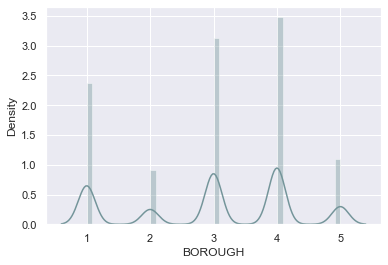

In [198]:
sns.distplot(data['BOROUGH'],
            color='#74959A')

Dilakukan pengelompokan variabel borough untuk dilakukan plotting distribusi untuk melihat bentuk grafik distribusi yang dihasilkan.

In [157]:
df1 = data['BOROUGH'].groupby(data['BOROUGH']).value_counts()
df1

BOROUGH  BOROUGH
1        1          18306
2        2           7049
3        3          24047
4        4          26736
5        5           8410
Name: BOROUGH, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Distribution '), Text(0, 0.5, 'Frequency')]

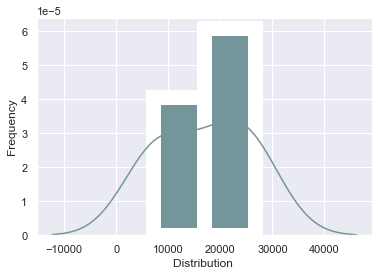

In [359]:
ax = sns.distplot(df1,
                  bins=2,
                  kde=True,
                  color='#74959A',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Distribution ', ylabel='Frequency')

Dari grafik yang dihasilkan, terlihat bahwa data untuk variabel BOROUGH berdistribusi Uniform. 

**Plot Data Block**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BLOCK', ylabel='Density'>

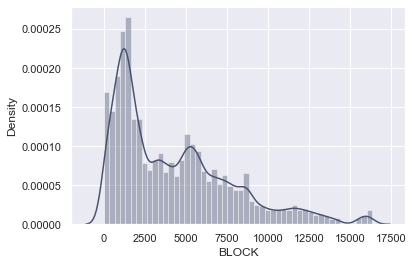

In [201]:
sns.distplot(data['BLOCK'],
            color='#495371')

Dari grafik yang dihasilkan, terlihat bahwa data untuk variabel BLOCK berdistribusi Exponensial. 

**Plot Data LOT**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOT', ylabel='Density'>

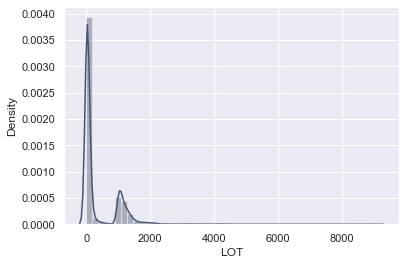

In [203]:
sns.distplot(data['LOT'],
            color='#495371')

Dari grafik yang dihasilkan, terlihat bahwa data untuk variabel LOT 
berdistribusi Exponensial. 

**Plot Data BUILDING CLASS CATEGORY_new**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUILDING CLASS CATEGORY_new', ylabel='Density'>

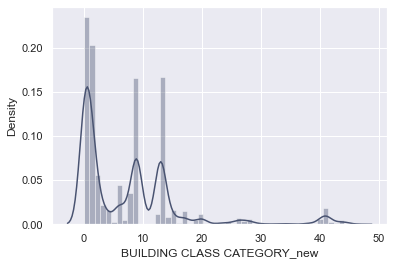

In [196]:
sns.distplot(data['BUILDING CLASS CATEGORY_new'],
            color='#495371')

Dari grafik yang dihasilkan, terlihat bahwa data untuk variabel BUILDING CLASS CATEGORY_new berdistribusi Exponensial. 

**Plot Data BUILDING CLASS AT TIME OF SALE_new**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE_new', ylabel='Density'>

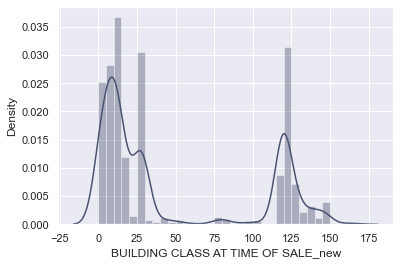

In [202]:
sns.distplot(data['BUILDING CLASS AT TIME OF SALE_new'],
            color='#495371')

Dari grafik yang dihasilkan, terlihat bahwa data untuk variabel BUILDING CLASS AT TIME OF SALE_new berdistribusi Exponensial. 

Dari beberapa data yang telah dilakukan visualisasi kurva, data yang dihasilan tidak berdistribusi normal.

## B. Confidence Intervals

In [238]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

Digunakan variabel **BUILDING CLASS CATEGORY_new** untuk melihat cofidence intervalnya.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BUILDING CLASS CATEGORY_new', ylabel='Density'>

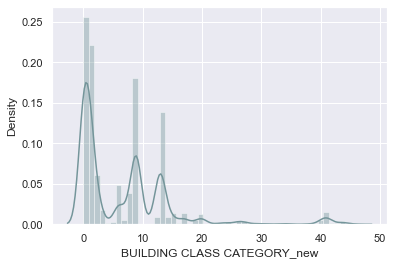

In [281]:
sns.distplot(data['BUILDING CLASS CATEGORY_new'],
            color='#74959A')

In [285]:
df2 = data['BUILDING CLASS CATEGORY_new'].groupby(data['BUILDING CLASS CATEGORY_new']).value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'BUILDING CLASS CATEGORY_new'), Text(0, 0.5, 'Density')]

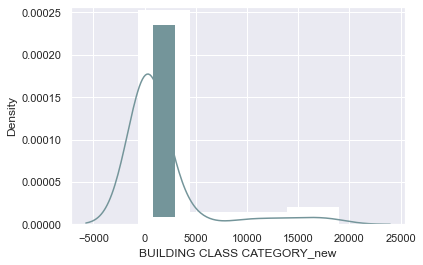

In [360]:
ax = sns.distplot(df2,
                  bins=5,
                  kde=True,
                  color='#74959A',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='BUILDING CLASS CATEGORY_new', ylabel='Density')

Sulit untuk mengkarakterisasi distribusi yang terbentuk, karena distribusi ini memiliki lebih dari 1 puncak dan tidak terlihat simetris.

In [287]:
# Calculation Population Mean
pop_mean = data['BUILDING CLASS CATEGORY_new'].mean()
pop_mean

6.708010002835856

In [288]:
# Calculate Population Standard Deviation
pop_std_dev= data['BUILDING CLASS CATEGORY_new'].std()
pop_std_dev

8.38782716909997

Akan diambil 300 sampel masing-masing dari 25 nilai acak. Untuk setiap sampel akan dihitung rata-rata sampel yang akan disimpan pada list sample_means.

In [361]:
sample_means = []
n = 25
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=data['BOROUGH'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


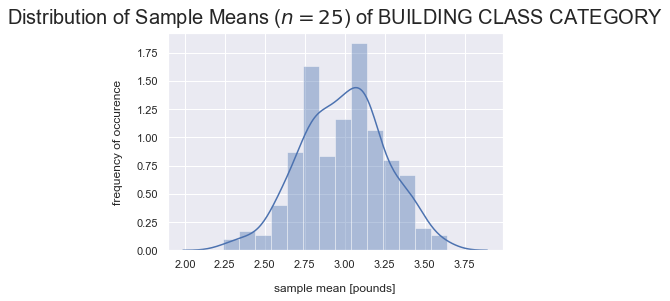

In [362]:
# View Distribution of Sample Means (Otherwise Called Sampling Distribution)
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=25$) of BUILDING CLASS CATEGORY", y=1.015, fontsize=20)
plt.xlabel("sample mean [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Apabila dilihat dari bentuk kurva yang terbentuk, terlihat sudah cukup simestris. 

### Calculate Sampling Distribution (n=25) Summary Statistics

> Dilakukan perhitungan mean, median, varians, dan standar deviasi dari sample yang terpilih.

In [293]:
# Calculate Median of Sample Means
median_of_sample_means = np.mean(sample_means)
median_of_sample_means

3.0513333333333335

In [363]:
# Calculate Mean of Sample Means
median_of_sample_means = np.median(sample_means)
mean_of_sample_means

3.0513333333333335

In [364]:
# Calculate Standard Deviation of Sample Means
var_of_sample_means = np.var(sample_means)
var_of_sample_means

0.0692375288888889

In [365]:
# Calculate Standard Deviation of Sample Means
std_dev_of_sample_means = np.std(sample_means)
std_dev_of_sample_means

0.26313025080535474

### Equation for Standard Deviation of Sampling Distribution

> Dilakukan juga perhitungan standard error (SE) dari distribusi sampelnya.

In [366]:
standard_error = pop_std_dev/np.sqrt(n)
standard_error

1.677565433819994

In [367]:
std_dev_of_sample_means

0.26313025080535474

### Critical Z-Scores

> Nilai z-score two-tailed dengan nilai alpha sebesar 0.5, didapatkan nilai sebesar 1.96 sehingga dapat digunakan untuk mencari nilai kritis dari z-score.

In [368]:
tail = 1 - stats.norm.cdf(1.96)
tail

0.024997895148220484

In [369]:
# The area under the curve between the z-critcal scores is approximately 0.95
1 - (tail * 2)

0.950004209703559

In [370]:
lower_95_perc_bound = mean_of_sample_means - 1.96*standard_error
lower_95_perc_bound

-0.23669491695385458

In [371]:
upper_95_perc_bound = mean_of_sample_means + 1.96*standard_error
upper_95_perc_bound

6.339361583620521

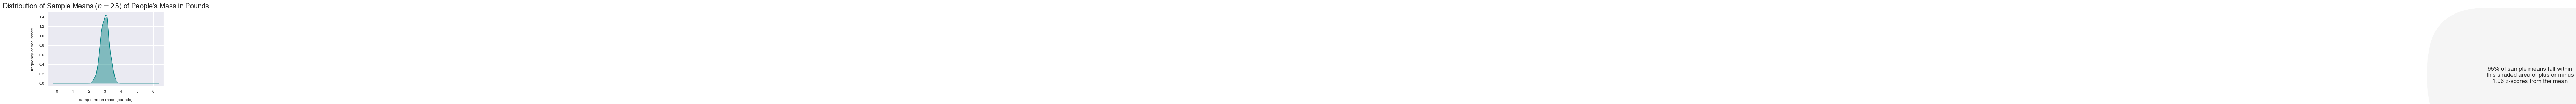

In [372]:
kde = stats.gaussian_kde(sample_means)
pos = np.linspace(np.min(sample_means), np.max(sample_means), 100)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(lower_95_perc_bound, upper_95_perc_bound, 50)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal',)
plt.text(x=154, y=.01, horizontalalignment='center', fontsize=17, 
         s="95% of sample means fall within\nthis shaded area of plus or minus\n1.96 z-scores from the mean", 
         bbox=dict(facecolor='whitesmoke', boxstyle="round, pad=10"))
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Berdasarkan hasil perhitungan di atas, didapatkam nilai lower 95% bound sebesar -0.23669491695385458 dan upper 95% bound sebesar 6.339361583620521, yang berarti nilai yang dihasilkan berada -0.23669491695385458 < x < 6.339361583620521.

## C. Hypothesis Testing

In [253]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [272]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77578 entries, 0 to 84547
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   BOROUGH                             77578 non-null  int64 
 1   BLOCK                               77578 non-null  int64 
 2   LOT                                 77578 non-null  int64 
 3   RESIDENTIAL UNITS                   77578 non-null  int64 
 4   COMMERCIAL UNITS                    77578 non-null  int64 
 5   TOTAL UNITS                         77578 non-null  int64 
 6   LAND SQUARE FEET                    77578 non-null  object
 7   GROSS SQUARE FEET                   77578 non-null  object
 8   TAX CLASS AT TIME OF SALE           77578 non-null  int64 
 9   SALE PRICE                          77578 non-null  object
 10  BUILDING CLASS AT PRESENT_new       77578 non-null  int16 
 11  NEIGHBORHOOD_new                    77578 non-null  in

Pertanyaan yang digunakan : 

apakah ada perbedaan unit yang terjual berdasarkan kategori bangunan?

- alpha : 0.05
> Hipotesis
- H0 : Terdapat Perbedaan unit yang terjual berdasarkan kategori bangunan
- H1 : Tidan Terdapat Perbedaan unit yang terjual berdasarkan kategori bangunan
> Kriteria Uji
- Data memiliki korelasi apabila angka korelasi yang dihasilkan =! 0

In [373]:
data.corr()

,BOROUGH,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT PRESENT_new,NEIGHBORHOOD_new,BUILDING CLASS CATEGORY_new,TAX CLASS AT PRESENT_new,ADDRESS_new,BUILDING CLASS AT TIME OF SALE_new
BOROUGH,1.000000,0.417001,-0.277848,-0.023229,-0.005503,-0.023346,0.108303,-0.315163,-0.303971,-0.144981,-0.317936,-0.361609,0.040622,-0.311548
BLOCK,0.417001,1.000000,-0.229118,-0.015628,-0.003517,-0.015888,0.071262,-0.287300,-0.296627,-0.015612,-0.292885,-0.336206,-0.121320,-0.300279
LOT,-0.277848,-0.229118,1.000000,-0.034303,-0.010953,-0.033169,-0.289463,0.296680,0.657077,0.064599,0.450135,0.319449,-0.041106,0.681074
RESIDENTIAL UNITS,-0.023229,-0.015628,-0.034303,1.000000,0.015653,0.888309,0.025380,-0.001074,-0.033562,-0.008771,-0.024709,0.009022,0.003751,-0.035447
COMMERCIAL UNITS,-0.005503,-0.003517,-0.010953,0.015653,1.000000,0.472998,0.006428,0.049586,0.019020,-0.003299,0.030697,0.041650,0.003258,0.019494
TOTAL UNITS,-0.023346,-0.015888,-0.033169,0.888309,0.472998,1.000000,0.024568,0.026429,-0.018224,-0.009389,-0.001565,0.030853,0.004766,-0.019723
YEAR BUILT,0.108303,0.071262,-0.289463,0.025380,0.006428,0.024568,1.000000,-0.187609,-0.359724,-0.034196,-0.258683,-0.152360,-0.034959,-0.425983
TAX CLASS AT TIME OF SALE,-0.315163,-0.287300,0.296680,-0.001074,0.049586,0.026429,-0.187609,1.000000,0.510355,0.036727,0.935198,0.932756,0.009978,0.525264
BUILDING CLASS AT PRESENT_new,-0.303971,-0.296627,0.657077,-0.033562,0.019020,-0.018224,-0.359724,0.510355,1.000000,0.022864,0.644088,0.586269,0.022476,0.973161
NEIGHBORHOOD_new,-0.144981,-0.015612,0.064599,-0.008771,-0.003299,-0.009389,-0.034196,0.036727,0.022864,1.000000,0.034504,0.040401,-0.037837,0.023519


Untuk variabel unit yang terjual dan kategori bangunan memuliki angka korelasi 0.006218	yang berarti unit yang terjual berdasarkan kategori bangunan memiliki korelasi yang sangat kecil yaitu sebesar 0.006218.	

Terlihat ada nilai korelasi yang cukup besar data NYC Rolling sales yaitu antara Building Class Category (kategori bangunan) dan TAX CLASS AT PRESENT (pajak saat ini) yaitu sebesar 0.006218. Akan dilihat melalui scatter plot terlebih dahulu. 

<AxesSubplot:xlabel='BUILDING CLASS CATEGORY_new', ylabel='TAX CLASS AT PRESENT_new'>

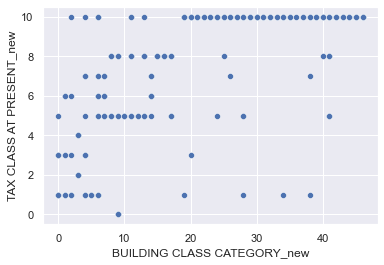

In [277]:
sns.scatterplot(x=data["BUILDING CLASS CATEGORY_new"], y=data["TAX CLASS AT PRESENT_new"], 
data=data)

Dari scatter plot yang terbentuk, dapat dilihat bahwa penyebaran data yang dihasikan cuku terlihat liniear yang berarti data BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT berkorelasi poitif. 

**Akan dilakukan analisis korelasi menggunakan Rank Spearmann**
> digunakan library scipy.

**Asumsi :**
- Data berdistribusi Normal, iid

- alpha : 0.05

**Hipotesis**
- H0 : BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new independen
- H1 : BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new dependen

**Kriteria Uji**
- Tolak H0 apabila p-value < alpha

In [374]:
from scipy.stats import spearmanr

In [375]:
stat, p = spearmanr(data["BUILDING CLASS CATEGORY_new"], data["TAX CLASS AT PRESENT_new"])

In [376]:
stat, p

(0.8554041380404678, 0.0)

In [377]:
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

stat=0.855, p=0.000
Probably dependent


**Kesimpulan**

berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar 0.00 < alpha = 0.05 yang berarti H0 di tolak atau BUILDING CLASS CATEGORY_new dan TAX CLASS AT PRESENT_new dependen (saling berhubungan).




**Akan dilakukan analisis korelasi menggunakan z-test**

**Asumsi :**
- Data berdistribusi Normal, iid

- alpha : 0.05

**Hipotesis**
- H0 : sale price BOROUGH1 > BOROUGH2
- H1 : sale price BOROUGH1 < BOROUGH2

**Kriteria Uji**
- Tolak H0 apabila p-value < alpha

In [308]:
b1 = data[data['BOROUGH'] == 1]
b2 = data[data['BOROUGH'] == 2]

# Graded-Funtion
n1 = len(b1)
mu1 = b1["SALE PRICE"].mean()
sd1 = b1["SALE PRICE"].std()

n2 = len(b2)
mu2 = b2["SALE PRICE"].mean()
sd2 = b2["SALE PRICE"].std()

print(n1, mu1, sd1)
print(n2, mu2, sd2)

16003 2834867.7293632445 22770818.97329758
6328 632252.5246523388 2923011.7614653907


In [309]:
sm.stats.ztest(b1["SALE PRICE"].dropna(), b2["SALE PRICE"].dropna(),alternative='two-sided')

(7.669678691938014, 1.7242773338602057e-14)

**Kesimpulan**

berdasarkan hasil perhitungan di atas, didapatkan nilai p-value sebesar 1.7242773338602057e-14 > alpha = 0.05 yang berarti H0 diterima atau sale price BOROUGH1 > BOROUGH2.

## FIRYA FATIN RAHMADANTI
PYTN-KS06-005